# Feature Engineering

Feature Engineering refers to the process of creatino new features or modifying existng features in the dataset to imporve the performance of machine learning model. It involves selection, transformation or generatin features that can he;lp ML model to better understand the features within the data.

* Feature Transformation: Modifying existing features to make them more suitable for model. Commom techniques include:
    * Missing values (Eg: imputation)
    * Outliers
    * Scaling (Eg: Normalization, Standardization)
    * Encoding (Eg: One hot encoding, label encoding)
    * Mathematical Transformation
* Feature Construction: Sometimes you may need to create features from existing featues to make them more suitable for model
* Feature selectio: This involves selecting the most relevent features from the dataset. There are different techniques that can be used to identify the keep the most import features, reducing dimensionality and potential noise:
    * Correlation Analysis
    * Feature import scores
    * domain knowledge
* Feature Extraction


In Feature Engineering, we will be doing fit-transform on the train data and transform on test data.  
To avoide overfitting, divide the data in tran-test, find mean and SD of train data and use the same mean and SD for test dataset.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np


## Scaling
* ITs a crutual step in feature engineering, where you manuplate and preporcess the features.
* the goal of scaling is to bring all features to similar scale, to ensure model can learn from it effectively.
* It helps prevent certain features dominating the learning process due to their large magnitude.
* Types of scalng are mentiond below

    * StandardScaling (Z-Score Sclaing)
    * MinMaxScaling(Normalization)
    * Robust Scaling
    * Log Transformation
    * Max Absolute Scaling
    * Quantile Scaling

#### When to use which Scaling?
    For this the answer is not specific, but as per the observation,  
    * when we have data within specific range use MinMaxScaler()
    * when the data range is not specific use StandardScaler()

In [4]:
# net_add=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")
net_add = pd.read_csv("D:/Learning/INeuron/Live/Datasets/social_net_ads.csv")

In [5]:
net_add.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [10]:
sample_net_add = net_add.iloc[:,2:]
sample_net_add.head()

print(sample_net_add.shape)

(400, 3)


In [11]:
# tran_test split 
from sklearn.model_selection import train_test_split

x = sample_net_add.iloc[:,:2]
y = sample_net_add.iloc[:,2:]

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

### 1. StandardScaling (z-Score Scaling)

* It Scales the feature to have mean=0 and SD=1. 
* This is useful when data follows normal distribution.
* IT is less sensative to outliers as compared to Min_max Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x.columns)

In [35]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

Visualize data fro Train and Test

<Axes: title={'center': 'Train data After Standardization'}, xlabel='Age', ylabel='EstimatedSalary'>

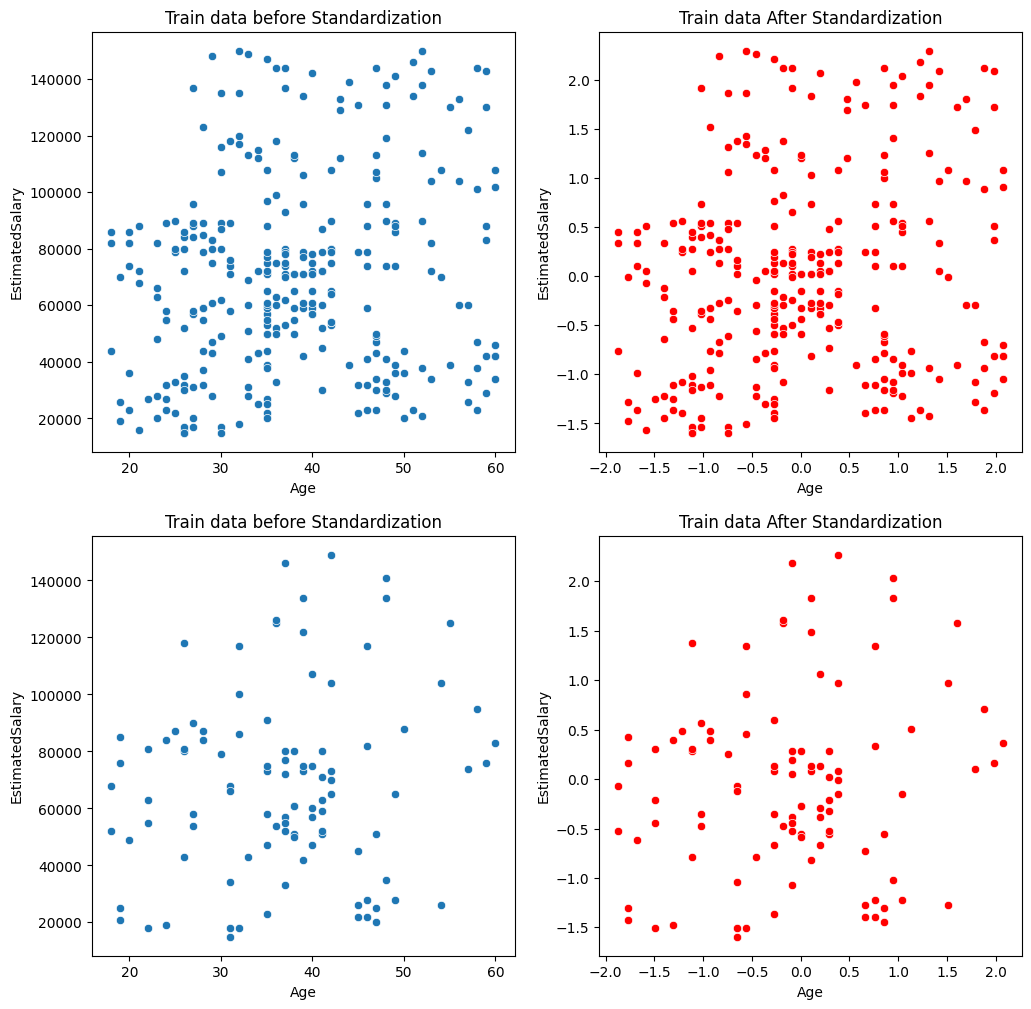

In [41]:
plt.figure(figsize=(12,12))

# Train Data before Scaling
plt.subplot(2,2,1)
plt.title('Train data before Standardization')
sns.scatterplot(x = X_train['Age'], y=X_train["EstimatedSalary"])

# Train Data after Scaling
plt.subplot(2,2,2)
plt.title('Train data After Standardization')
sns.scatterplot(x = X_train_scaled_df['Age'], y = X_train_scaled_df['EstimatedSalary'], color='red')

# Test Data before Scaling
plt.subplot(2,2,3)
plt.title('Train data before Standardization')
sns.scatterplot(x = X_test['Age'], y=X_test["EstimatedSalary"])

# Test Data after Scaling
plt.subplot(2,2,4)
plt.title('Train data After Standardization')
sns.scatterplot(x = X_test_scaled_df['Age'], y = X_test_scaled_df['EstimatedSalary'], color='red')

### 2. Robust Scaling
* Similar to Standardization, but is more robust to outliers.
* IT scales the features based on median and IQR(Inter Quartile range)

### 3. MinMaxScaling (Normalization)

* It is also known as Normalization, scales data within specific range, usually between 0 and 1
* This method is sensative to outliers, presence of extream value can significantly affect the scaling.

In [42]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

In [44]:
min_max_scaler.fit(X_train)

MinMaxScaler()

In [53]:
x_train_min_max = min_max_scaler.transform(X_train)

In [54]:
x_test_min_max = min_max_scaler.transform(X_test)

In [55]:
x_train_min_max_df = pd.DataFrame(x_train_min_max, columns=X_train.columns)
x_test_min_max_df = pd.DataFrame(x_test_min_max, columns=X_test.columns)

In [51]:
x_train_min_max_df.head()

,Age,EstimatedSalary
0,0.714286,0.437037
1,0.357143,0.992593
2,0.190476,0.007407
3,1.000000,0.644444
4,0.261905,0.340741


<Axes: title={'center': 'Test Data after Min Max Transformation'}, xlabel='Age', ylabel='EstimatedSalary'>

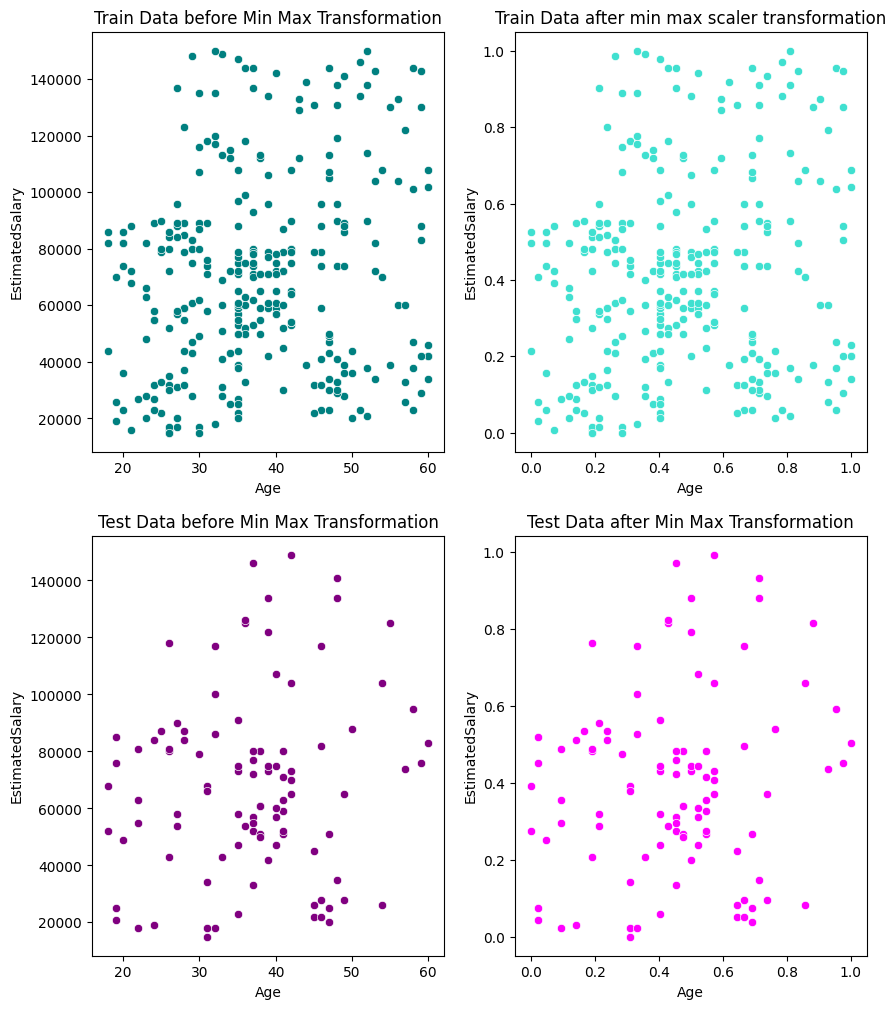

In [72]:
plt.figure(figsize=(10,12))

# Train Data Before transformation
plt.subplot(2,2,1)
plt.title('Train Data before Min Max Transformation')
sns.scatterplot(x=X_train['Age'], y=X_train['EstimatedSalary'], color='teal')

# Train data after transformation
plt.subplot(2,2,2)
plt.title('Train Data after min max scaler transformation')
sns.scatterplot(x=x_train_min_max_df['Age'], y=x_train_min_max_df['EstimatedSalary'], color='turquoise')

# Test data before transformation
plt.subplot(2,2,3)
plt.title('Test Data before Min Max Transformation')
sns.scatterplot(x=X_test['Age'], y=X_test['EstimatedSalary'], color='purple')

# Test data after transformation
plt.subplot(2,2,4)
plt.title('Test Data after Min Max Transformation')
sns.scatterplot(x=x_test_min_max_df['Age'], y=x_test_min_max_df['EstimatedSalary'], color='Magenta')

### 4. Log Transformation
* is used when data has skewed distribution.
* it applies logarithmic function to feature values.
* suitable for data which has exponential or multiplicative relationship

### 5. Max Absolute Scaling
* IT sclaes features by deviding each value with max absolute value in the feature.
* Its useful when you want to preserve the sign of data and are not concerned about centering the data.

### 6. Quantile Transformatin

* It maps the data to specific quantile of reference distribution.
* This method can be useful for making data confirm to a uniform or normal distribution.

## ENCODING

* It is the process of converting categorical data into numerical data.
* since most machine learning algorithm works with numerical data, encoding becomes important
* Types of Encoding
    * Ordinal Encoding
    * One-Hot Encoding (Dummy Encoding)
    * Label Encoding
    * Binary Encoding
    * Target Encoding (Mean Encoding)
    * Frequency Encoding
    * Hashing Encoding
    * Feature Embedding (Word Embedding)

In [40]:
# Reading data from external sources and storing it into local

# customer=pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day26-ordinal-encoding/customer.csv")
# customer.to_csv("D:/Learning/INeuron/Live/Datasets/customer.csv", index=False)

In [75]:
# Read customer dataset

customer = pd.read_csv("D:/Learning/INeuron/Live/Datasets/customer.csv")

customer.sample(5) # Get 5 random samples

,age,gender,review,education,purchased
47,38,Female,Good,PG,Yes
26,53,Female,Poor,PG,No
29,83,Female,Average,UG,Yes
13,57,Female,Average,School,No
12,51,Male,Poor,School,No


### 1. Ordinal Encoding
* Used when dealing with ordinal data. 
* it assignes numerical values to categories based on their order.

In [76]:
# Get the features in other DF 
 
sub_cust = customer.iloc[:,2:-1]
sub_cust.head()

,review,education
0,Average,School
1,Poor,UG
2,Good,PG
3,Good,PG
4,Average,UG


In [77]:
# Split data into train test 

X_train,X_test =  train_test_split(sub_cust, test_size=0.30)

In [78]:
X_train.head()

,review,education
16,Poor,UG
28,Poor,School
12,Poor,School
19,Poor,PG
40,Good,School


In [79]:
X_test.head()

,review,education
1,Poor,UG
49,Good,UG
13,Average,School
7,Poor,School
9,Good,UG


In [80]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoding = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [81]:
ordinal_encoding.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [83]:
x_train_transfor = ordinal_encoding.transform(X_train)
x_test_transform = ordinal_encoding.transform(X_test)

In [85]:
x_train_ordinal_df = pd.DataFrame(x_train_transfor, columns=X_train.columns)
x_test_oridnal_df = pd.DataFrame(x_test_transform, columns=X_test.columns)

### 2. One-Hot Encoding (Dummy Encoding)
* It transforms each categories into a binary vector.
* for each category a new binary feature is created and only one of them is hot(1), while other is cold(0).
* This method i suitable for nominal data and avoid introducting artificial relationship between categories.
* however, it can lead to high dimension data, which may cause issue with memory and computation for large dataset.
* Ex: 

            Categories: Red, Green, Blue
            One-Hot Encoding:
            Red - [1, 0, 0]
            Green - [0, 1, 0]
            Blue - [0, 0, 1]


In [158]:
one_hot_df = customer[['gender']]

In [159]:
one_hot_df.head()

,gender
0,Female
1,Female
2,Female
3,Female
4,Female


In [164]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(drop="first",sparse=False, dtype=np.int32)

* **sparse=False:** This is an argument provided to the OneHotEncoder constructor. When sparse is set to False, it means that the encoder will return a dense array or matrix instead of a sparse matrix. Sparse matrices are more memory-efficient when dealing with a large number of categories, but setting it to False results in a regular, dense NumPy array.
* **dtype=np.int32**: This argument specifies the data type (data type object) for the encoded values in the resulting array. In this case, it sets the data type to 32-bit signed integer (int32). This is often used to ensure that the encoded values are represented as integers rather than floating-point numbers.

In [165]:
one_hot.fit(one_hot_df[['gender']])

d:\Learning\INeuron\Live\10_feature_engineering\venv_10\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse=False,
              sparse_output=False)

In [166]:
one_hot_tranformed = one_hot.transform(one_hot_df[['gender']])

In [167]:
all_genders = one_hot_df['gender'].unique()

In [169]:
one_hot_transformed_df = pd.DataFrame(one_hot_tranformed, columns=['gender'])

In [170]:
one_hot_transformed_df.head()

,gender
0,0
1,0
2,0
3,0
4,0


In [172]:
one_hot_transformed_df['gender'].unique()

array([0, 1])

In [154]:
# EXAMPLE 2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame
data = {'gender': ['Male', 'Female', 'Male', 'Non-Binary', 'Female']}
df = pd.DataFrame(data)

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit the encoder to the "gender" column
encoder.fit(df[['gender']])

# Transform the data to one-hot encoded format
one_hot_encoded = encoder.transform(df[['gender']])

# Convert the one-hot encoded data to a DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names_out(['gender']))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([df, one_hot_df], axis=1)

# Drop the original "gender" column if needed
df = df.drop(['gender'], axis=1)

# Now, df contains the one-hot encoded "gender" column
print(df)


   gender_Female  gender_Male  gender_Non-Binary
0            0.0          1.0                0.0
1            1.0          0.0                0.0
2            0.0          1.0                0.0
3            0.0          0.0                1.0
4            1.0          0.0                0.0


### 3. Label Encoder:
* Assing unique integer to each category.
* Its suitable for ordinal data where there is clear ranking.
* It can be problematic for nominal data (cateegory with no intrinsic order)


        Categories: Red, Green, Blue
        Label Encoding: Red - 0, Green - 1, Blue - 2


### 4. Binary Encoding

* binary encoding combines the benefits of both labels and one-hot encoding.
* It convert each category into binary code and create fewer features compared to one-hot encoding.
* This can be more memory-efficient and suitable for high-cardinality cariable.
* Example:

        Categories: Red, Green, Blue
        Binary Encoding:
        Red - 001
        Green - 010
        Blue - 100


### 5. Target Encoding (Mean Encoding):
* Target encoding using the mean of target variable for each category.
* THis can be useful when the target variable is numeric.
* However, it can lead to overfitting if not used carefully and can be problematic for categories that appears infrequently.

### 6. Frequency Encoding
* Frequency encoding replaces each category with its frequency (count) in the datastet.
* This can be helps the model understand the importance of each category.
* it may not work well for rare category.

### 7. Hashing Encoding:
* it involves hashing categorical values into a fixed number of numerical columns. 
* THis method can be memory-effecient and is useful for handling high-cardinality categorical varialbes.

### 8. Feature Embedding (Work Embeddings)

* Feature Embedding technique, such as Word2Vec and FastText, are commonly sed for encoding text data or categorical variable with a large number of categories.


## Handle Missing Values

In [3]:
titanic = pd.read_csv("D:/Learning/INeuron/Live/Datasets/titanic_train.csv")

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [26]:
sample_titanic = titanic[['Age','Fare', 'SibSp','Survived','Cabin']]

In [27]:
sample_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
 4   Cabin     204 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 34.9+ KB


In [8]:
sample_titanic.isna().sum()

Age         177
Fare          0
SibSp         0
Survived      0
dtype: int64

In [25]:
# Split data in train and test 
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(sample_titanic, test_size=0.30)

##### TO Fill missing values in single column (Univarient), we can use 'simpleimputer' from sklearn

Fill Missing Values in Numerical columns

In [10]:
# There are huge number of missing values for age column
# fill the values with the mean of age

mean_age = sample_titanic['Age'].mean()
mean_age

29.69911764705882

In [20]:
sample_titanic['Age'] = sample_titanic['Age'].fillna(mean_age)


C:\Users\HP\AppData\Local\Temp\ipykernel_1892\867528031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_titanic['Age'] = sample_titanic['Age'].fillna(mean_age)


In [23]:
sample_titanic['Age'].isna().sum()

0

Fill Missing values in categorical columns

In [32]:
print(sample_titanic['Cabin'].head())

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object


In [33]:
sample_titanic['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [37]:
mode = sample_titanic['Cabin'].mode()
mode

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [38]:
sample_titanic['Cabin'] = sample_titanic['Cabin'].fillna(mode[2])

C:\Users\HP\AppData\Local\Temp\ipykernel_1892\3834597112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_titanic['Cabin'] = sample_titanic['Cabin'].fillna(mode[2])


In [39]:
sample_titanic['Cabin'].isna().sum()

0

##### TO Fill missing values in multiple column (Univarient), we can use 'knnimputer' from sklearn

## Outliers handling and detection

* Handling outliers is important  step to ensure ML model perform well and are not influenced by external values.
* Outliers can deviate rest of the data and can affect the models accuracy.
* There are several techniques to handle outliers

In [73]:
# path = 'https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv'
# placement = pd.read_csv(path)
# placement.to_csv('D:/Learning/INeuron/Live/Datasets/placement.csv',index=False)

# Read placement dataset
placement = pd.read_csv('D:/Learning/INeuron/Live/Datasets/placement.csv')
placement.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [74]:
# summerize data
placement.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


### 1. Indntifying and Visualization:
* YOu can use descriptive statistics, data visualization techniques or domain knowledge to delete outliers.

### 2. Trimming:
* Trimming involves removing extream values from dataset. 
* You can choose to remove specific percentage of data points from lower and upper end of the distribution.
* be cautious while applying trimming, as it leads to loss of information, ecpecially if the outliers contain valuable insights or patterns.

#### trimming using SD

In [79]:
# for cgpa column remove the outliers which are out of 2 standard deviation
# Calculate Lower and upper bound
lower_bound = placement['cgpa'].mean() - 3 * placement['cgpa'].std()
upper_bound = placement['cgpa'].mean() + 3 * placement['cgpa'].std()

# Trim data and store it in new dataframe
new_placement = placement[(placement['cgpa'] > lower_bound) & (placement['cgpa'] < upper_bound)]

C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2657539191.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement['cgpa'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2657539191.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_placement['cgpa'])
C:\Users\HP\AppData\Local\Temp\ipyke

<Axes: xlabel='placement_exam_marks', ylabel='Density'>

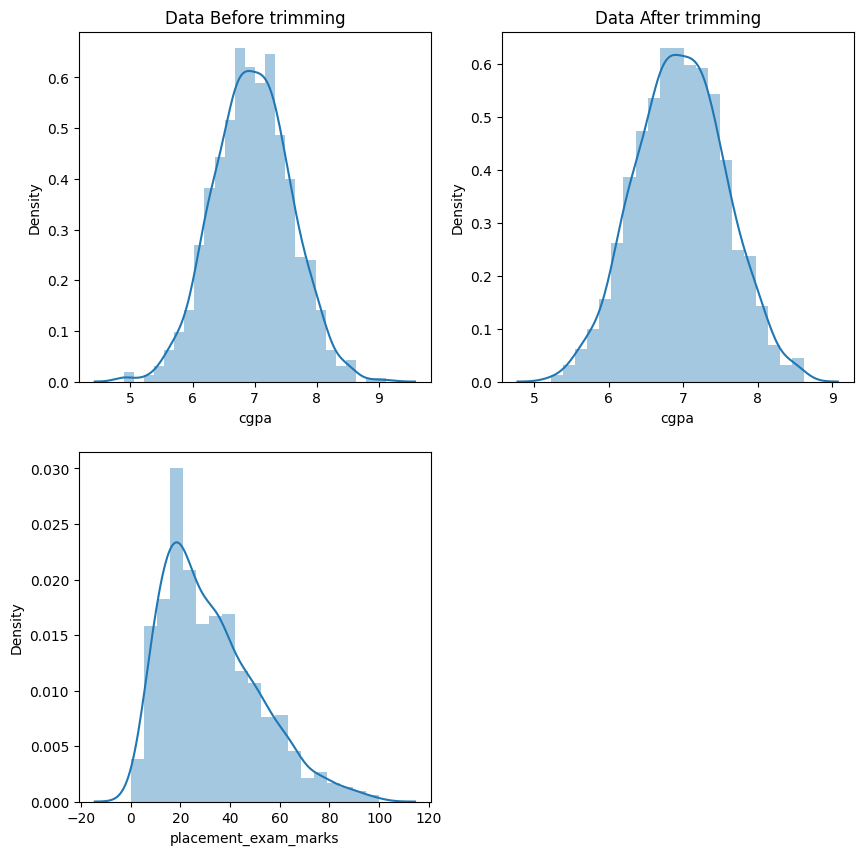

In [84]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Data Before trimming")
sns.distplot(placement['cgpa'])

plt.subplot(2,2,2)
plt.title("Data After trimming")
sns.distplot(new_placement['cgpa'])

plt.subplot(2,2,3)
sns.distplot(placement['placement_exam_marks'])


#### IQR outlier removal method

Removing outliers using the Interquartile Range (IQR) method is often referred to as "IQR-based outlier detection" or simply "IQR outlier removal." This method is a common approach for identifying and dealing with outliers in a dataset. It is a robust statistical technique that relies on the quartiles of the data distribution to identify values that fall significantly outside the expected range.

Here's a general outline of how IQR-based outlier removal works:

* Calculate the first quartile (Q1) and the third quartile (Q3) of the dataset.
* Compute the IQR, which is the difference between Q3 and Q1: IQR = Q3 - Q1.
* Define lower and upper bounds for potential outliers: Lower Bound = Q1 - 1.5 * IQR and Upper Bound = Q3 + 1.5 * IQR.
* Identify values that fall below the Lower Bound or above the Upper Bound as potential outliers.

In [99]:
percentile_25 = placement['placement_exam_marks'].quantile(0.25)
percentile_75 = placement['placement_exam_marks'].quantile(0.75)

print("25 Percentile: ", percentile_25, "75 percentile: ", percentile_75)

25 Percentile:  17.0 75 percentile:  44.0


In [100]:
# calculate IQR
iqr = percentile_75 - percentile_25

In [101]:
# calculate upper bound and lower bound
lower_bound = percentile_25 - 1.5 * iqr
upper_bound = percentile_75 + 1.5 * iqr

In [103]:
iqr_trimmed_placement = placement[(placement['placement_exam_marks'] > lower_bound) & (placement['placement_exam_marks'] < upper_bound)]

C:\Users\HP\AppData\Local\Temp\ipykernel_1892\3648743849.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement['placement_exam_marks'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1892\3648743849.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iqr_trimmed_placement['placement_exam_marks

<Axes: title={'center': 'Data After trimming'}, xlabel='placement_exam_marks'>

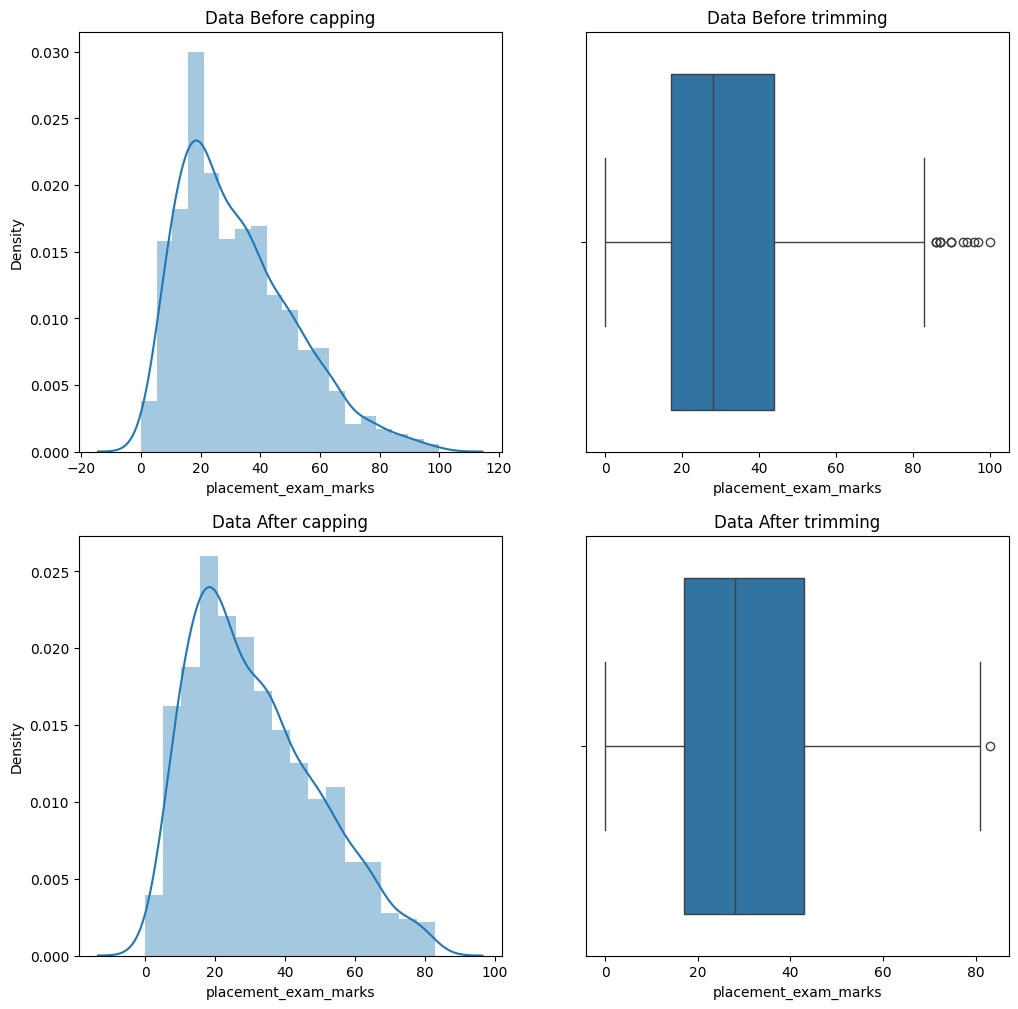

In [111]:
# visualize data 
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title("Data Before capping")
sns.distplot(placement['placement_exam_marks'])

plt.subplot(2,2,3)
plt.title("Data After capping")
sns.distplot(iqr_trimmed_placement['placement_exam_marks'])


plt.subplot(2,2,2)
plt.title("Data Before trimming")
sns.boxplot(x = placement['placement_exam_marks'])

plt.subplot(2,2,4)
plt.title("Data After trimming")
sns.boxplot(x = iqr_trimmed_placement['placement_exam_marks'])

### 3. Winsorizing (Capping)
* Ita a variation of trimming that caps extream values by replacing them with specific percentile.
* For Ex: you can replace values above 95 percentile with the value on the 95 percentile, and the value below 5 percentile with the value on 5th perentile

#### capping using SD

In [87]:
# for cgpa column remove the outliers which are out of 2 standard deviation
# Calculate Lower and upper bound
lower_bound = placement['cgpa'].mean() - 3 * placement['cgpa'].std()
upper_bound = placement['cgpa'].mean() + 3 * placement['cgpa'].std()

In [91]:
# data before capping
print("lower bound:", lower_bound, "\nupper_bound:",upper_bound)
print("Min of cgpa:", placement['cgpa'].min(), "\nMax of cgpa:", placement['cgpa'].max())

lower bound: 5.113546374602832 
upper_bound: 8.808933625397168
Min of cgpa: 4.89 
Max of cgpa: 9.12


In [92]:
# capping on 'cgpa' column
placement['cgpa'] = np.where(placement['cgpa'] < lower_bound, lower_bound, placement['cgpa'])
placement['cgpa'] = np.where(placement['cgpa'] > upper_bound, upper_bound, placement['cgpa'])

In [93]:
# data after capping
print("lower bound:", lower_bound, "\nupper_bound:",upper_bound)
print("Min of cgpa:", placement['cgpa'].min(), "\nMax of cgpa:", placement['cgpa'].max())

lower bound: 5.113546374602832 
upper_bound: 8.808933625397168
Min of cgpa: 5.113546374602832 
Max of cgpa: 8.808933625397168


C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2496514058.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement['cgpa'])
C:\Users\HP\AppData\Local\Temp\ipykernel_1892\2496514058.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_placement['cgpa'])


<Axes: title={'center': 'Data After capping'}, xlabel='cgpa', ylabel='Density'>

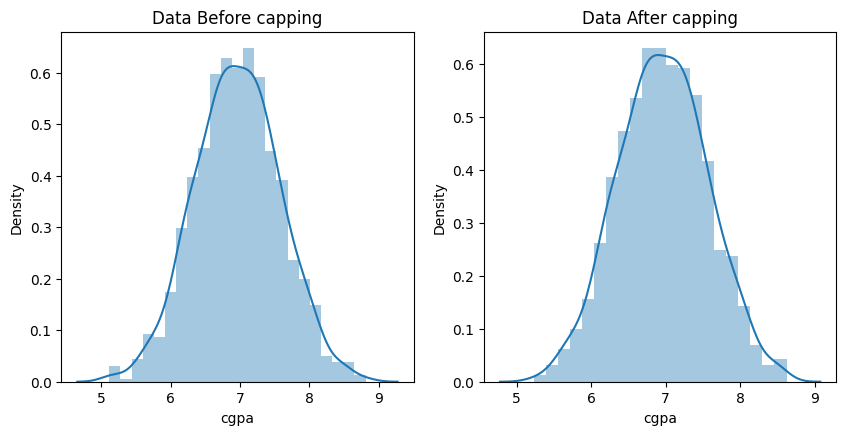

In [95]:
# visualize data 
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title("Data Before capping")
sns.distplot(placement['cgpa'])

plt.subplot(2,2,2)
plt.title("Data After capping")
sns.distplot(new_placement['cgpa'])

#### Capping using IQR outlier removal

In [112]:
percentile_25 = placement['placement_exam_marks'].quantile(0.25)
percentile_75 = placement['placement_exam_marks'].quantile(0.75)

In [113]:
# calculate IQR 
iqr = percentile_75 - percentile_25

In [115]:
# calculate lower and upper bound 
lower_bound = percentile_25 - 1.5 * iqr
upper_bound = percentile_75 + 1.5 * iqr

In [116]:
# data before capping
print("lower bound:", lower_bound, "\nupper_bound:",upper_bound)
print("Min of placement_exam_marks:", placement['placement_exam_marks'].min(), "\nMax of placement_exam_marks:", placement['placement_exam_marks'].max())

lower bound: -23.5 
upper_bound: 84.5
Min of placement_exam_marks: 0.0 
Max of placement_exam_marks: 100.0


In [117]:
placement['placement_exam_marks'] = np.where(placement['placement_exam_marks'] < lower_bound, lower_bound, placement['placement_exam_marks'])
placement['placement_exam_marks'] = np.where(placement['placement_exam_marks'] > upper_bound, upper_bound, placement['placement_exam_marks'])

In [119]:
# data after capping
print("lower bound:", lower_bound, "\nupper_bound:",upper_bound)
print("Min of placement_exam_marks:", placement['placement_exam_marks'].min(), "\nMax of placement_exam_marks:", placement['placement_exam_marks'].max())

lower bound: -23.5 
upper_bound: 84.5
Min of placement_exam_marks: 0.0 
Max of placement_exam_marks: 84.5


### 4.Transformation
* Transformation techniques aims to make data distribution more symmetric and reduce the impact of outliers.
* Common transformation techniques include:
    * Log Transformation:
        - Take the logarithm of the data can compress the range and make the data more normal distribution.
    * Box-Con Transformation: 
        - This Family of power transformation can stabilize varience and make data more normally distributed.
    * Yeo-Johnson Transformation:
        - Similar to Box-Con but allow data with zero or negative values.
            

### 5. Binning and Discretization
* Binning involves grouping data into bins or categories.
* Outliers can be placed into specific bins or category, which can reduce their influence on the model.
* However this approach my result in loss of information and sensative to the choice of bin boundries.

### 6. Statestical Testing
* SOme statestical testing like Z-Score or IQR method can help identify and remove outliers based on threshold defined by standard devitions or quantity.

### 7. Feature Engineering
* In some cases, outliers may be indicative of important information or special case.
 Isted of removing them , creat new feature that captures the information, such as binary flags.
